<a href="https://colab.research.google.com/github/ttcao63/775team_project_b2_t2/blob/main/Project_TingtingCao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Determine Risk Exposures

In [ ]:
#load the data files
data = pd.read_csv('Project-2017-21-Returns.csv')
ff_factors = pd.read_csv('FF-Factors-2017-2021.csv')

In [ ]:
#initial check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114715 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PERMNO  114715 non-null  int64 
 1   date    114715 non-null  int64 
 2   TICKER  114653 non-null  object
 3   RET     114700 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


In [ ]:
data.head()

,PERMNO,date,TICKER,RET
0,10026,20170131,JJSF,-0.043918
1,10026,20170228,JJSF,0.048836
2,10026,20170331,JJSF,0.016293
3,10026,20170428,JJSF,-0.007229
4,10026,20170531,JJSF,-0.033289


In [ ]:
#replace string with null values and fill na with mean
data['RET'] = data['RET'].replace(["C","B"], np.nan).astype('float')

mean_value=data['RET'].mean()
data['RET'].fillna(mean_value,inplace=True)

In [ ]:
ff_factors.head()

,dateff,mktrf,smb,hml,rf
0,20170131,0.0194,-0.0113,-0.0274,0.0004
1,20170228,0.0357,-0.0204,-0.0167,0.0004
2,20170331,0.0017,0.0113,-0.0333,0.0003
3,20170428,0.0109,0.0072,-0.0213,0.0005
4,20170531,0.0106,-0.0252,-0.0375,0.0006


In [ ]:
#merge two files based on date
data_ff = pd.merge(data,ff_factors,left_on='date',right_on='dateff',how='left')
data_ff

,PERMNO,date,TICKER,RET,dateff,mktrf,smb,hml,rf
0,10026,20170131,JJSF,-0.043918,20170131,0.0194,-0.0113,-0.0274,0.0004
1,10026,20170228,JJSF,0.048836,20170228,0.0357,-0.0204,-0.0167,0.0004
2,10026,20170331,JJSF,0.016293,20170331,0.0017,0.0113,-0.0333,0.0003
3,10026,20170428,JJSF,-0.007229,20170428,0.0109,0.0072,-0.0213,0.0005
4,10026,20170531,JJSF,-0.033289,20170531,0.0106,-0.0252,-0.0375,0.0006
...,...,...,...,...,...,...,...,...,...
114710,93436,20210831,TSLA,0.070605,20210831,0.0290,-0.0048,-0.0013,0.0000
114711,93436,20210930,TSLA,0.054042,20210930,-0.0437,0.0080,0.0509,0.0000
114712,93436,20211029,TSLA,0.436530,20211029,0.0665,-0.0228,-0.0044,0.0000
114713,93436,20211130,TSLA,0.027612,20211130,-0.0155,-0.0135,-0.0053,0.0000


In [ ]:
#make sure no null values
data_ff.isnull().sum()

PERMNO     0
date       0
TICKER    62
RET        0
dateff     0
mktrf      0
smb        0
hml        0
rf         0
dtype: int64

a. Similar to Assignment #3, calculate the Fama-French Risk Exposures for
the list of 3,000 tickers for (i) Market Risk Exposure; (ii) Size Risk
Exposure; and (iii) Value/Distress Risk Expsoure.

* $[Ret(MSFT)-Rf] = alpha + B1(RetMkt-Rf) + b2(SMB) + b3(HML) + e$

In [ ]:
#get a list of all the unique tickers
companies = data.TICKER.unique()
#create empty lists for all the regression outputs we want to store
Ticker = []
R_squared = []
Adj_R_squared = []
Parameters = []
for name in companies:
 #merge to FF data for all 100 copmanies using ticker and date
 df_ticker = data_ff
 #establish the x and y variables
 y = df_ticker["RET"] - df_ticker["rf"]
 X = df_ticker[['mktrf' , 'smb' , 'hml']]
 # Use statsmodels
 X = sm.add_constant(X) # adding a constant
 model = sm.OLS(y, X).fit()
 results_summary = model.summary()
 #append the regression outputs to the appropriate empty list create above
 Ticker.append(name)
 R_squared.append(model.rsquared)
 Adj_R_squared.append(model.rsquared_adj)
 Parameters.append(model.params)
#store the regression outputs as dataframes to be used in following steps
dfTicker = pd.DataFrame(Ticker)
dfR_squared = pd.DataFrame(R_squared)
dfAdj_R_squared = pd.DataFrame(Adj_R_squared)
dfParameters = pd.DataFrame(Parameters)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#creat a dataframe to store all Risk Exposure values
Final = pd.DataFrame({'TICKER' : dfTicker[0]})
Final['R_squared'] = dfR_squared
Final['Adj_R_squared'] = dfAdj_R_squared
Final['const'] = dfParameters['const']
Final['mktrf'] = dfParameters['mktrf']
Final['smb'] = dfParameters['smb']
Final['hml'] = dfParameters['hml']

In [ ]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TICKER         1924 non-null   object 
 1   R_squared      1925 non-null   float64
 2   Adj_R_squared  1925 non-null   float64
 3   const          1925 non-null   float64
 4   mktrf          1925 non-null   float64
 5   smb            1925 non-null   float64
 6   hml            1925 non-null   float64
dtypes: float64(6), object(1)
memory usage: 105.4+ KB


In [ ]:
Final.head()

,TICKER,R_squared,Adj_R_squared,const,mktrf,smb,hml
0,JJSF,0.151523,0.151501,0.004124,1.067576,0.665104,0.317125
1,PLXS,0.151523,0.151501,0.004124,1.067576,0.665104,0.317125
2,ORCL,0.151523,0.151501,0.004124,1.067576,0.665104,0.317125
3,MSFT,0.151523,0.151501,0.004124,1.067576,0.665104,0.317125
4,TROW,0.151523,0.151501,0.004124,1.067576,0.665104,0.317125


b. Save the ticker symbol and the 3 exposure values for each stock in the list
in a CSV file labelled “FF-Exposures.csv”.

In [ ]:
Final[['TICKER','mktrf','smb','hml']].to_csv("FF-Exposures.csv",index=False)

## Calculate Financial Ratios

### a. Based on the Lectures in BA870, calculate relevant financial ratios
(including market ratios) that you believe might explain a company’s stock
return in early 2022.

In [ ]:
#load the data files

ticker = pd.read_csv('ProjectTickers.csv')
data = pd.read_csv('Project-2021-Financials.csv')

In [ ]:
#initial check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   at        1886 non-null   float64
 10  ceq       1886 non-null   float64
 11  csho      1886 non-null   float64
 12  ebit      1886 non-null   float64
 13  ni        1886 non-null   float64
 14  re        1883 non-null   float64
 15  ret       135 non-null    float64
 16  sale      1886 non-null   float64
 17  seq       1886 non-null   float64
 18  costat    1886 non-null   object 
 19  prcc_c    1886 non-null   float64
dtypes: float64(10), int64(3), obje

In [ ]:
data.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,at,ceq,csho,ebit,ni,re,ret,sale,seq,costat,prcc_c
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,1539.700,974.4,35.375,65.50,35.80,723.400,NaN,1651.400,974.4,A,36.22
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,66467.000,-7340.0,647.728,-5514.00,-1993.00,-14580.000,NaN,29882.000,-7340.0,A,17.96
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,22003.222,5906.2,112.927,805.31,618.72,3209.858,NaN,3803.835,5906.2,A,70.59
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,75196.000,35802.0,1764.082,8966.00,7071.00,23154.000,NaN,43075.000,35802.0,A,140.74
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,12419.000,7497.0,1207.000,3678.00,3162.00,-1454.000,NaN,16434.000,7497.0,A,143.90


In [ ]:
ticker.head()

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456


In [ ]:
#merge two files based on ticker
data = pd.merge(data,ticker,left_on='tic',right_on='Ticker',how='left')
data

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,at,...,ni,re,ret,sale,seq,costat,prcc_c,Ticker,Name,RetYTD
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,1539.700,...,35.800,723.400,NaN,1651.400,974.400,A,36.22,AIR,AAR Corp,0.2944
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,66467.000,...,-1993.000,-14580.000,NaN,29882.000,-7340.000,A,17.96,AAL,American Airlines Gp,0.0579
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,22003.222,...,618.720,3209.858,NaN,3803.835,5906.200,A,70.59,PNW,Pinnacle West Capital Corp,0.0985
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,75196.000,...,7071.000,23154.000,NaN,43075.000,35802.000,A,140.74,ABT,Abbott Laboratories,-0.1638
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,12419.000,...,3162.000,-1454.000,NaN,16434.000,7497.000,A,143.90,AMD,Adv Micro Devices,-0.3533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,266315,20211231,2021,INDL,C,D,STD,KRG,USD,7639.575,...,-80.806,-978.815,6707.539,372.908,3922.047,A,21.78,KRG,Kite Realty Group Trust,0.0275
1882,294524,20211231,2021,INDL,C,D,STD,LYB,USD,36742.000,...,5610.000,6760.000,NaN,46173.000,11858.000,A,92.23,LYB,Lyondellbasell Industries NV,0.1664
1883,312009,20211231,2021,INDL,C,D,STD,FRO,USD,4117.098,...,-11.148,-2.902,NaN,749.381,1653.014,A,7.07,FRO,Frontline Ltd,0.3380
1884,316056,20211231,2021,INDL,C,D,STD,ALLE,USD,3051.000,...,483.000,758.200,NaN,2867.400,759.100,A,132.44,ALLE,Allegion Plc,-0.1888


In [ ]:
#drop unused column
data = data.drop(columns=['ret'])

In [ ]:
#check null values

data.isnull().sum()

gvkey       0
datadate    0
fyear       0
indfmt      0
consol      0
popsrc      0
datafmt     0
tic         0
curcd       0
at          0
ceq         0
csho        0
ebit        0
ni          0
re          3
sale        0
seq         0
costat      0
prcc_c      0
Ticker      0
Name        0
RetYTD      0
dtype: int64

### b. Calculate at least 10 ratios (including at least 2 market-based ratios) to use in the analysis.



### c. Use the methods from Assignment #4 to help you collect and calculate the financial ratios.

In [ ]:
data['Price/Book'] = data['prcc_c']*data['csho']/data['ceq']
data['P/E'] =  data['prcc_c']*data['csho']/data['ni']
data['P/EBIT'] = data['prcc_c']*data['csho']/data['ebit']
data['P/SALES'] = data['prcc_c']*data['csho']/data['sale']


data['Book/Price'] = 1/data['Price/Book']
data['E/P'] = 1/data['P/E'] 
data['EBIT/P'] = 1/data['P/EBIT']
data['SALES/P'] = 1/data['P/SALES']

In [ ]:
data['ROA'] = data['ni'] / data['at']
data['ROE'] = data['ni'] / data['seq']
data['Market Value'] = data['prcc_c'] * data['csho']

In [ ]:
data['RE/TA ratio']  = data['re']/data['at']
data['Asset Turnover Ratio'] = data['sale']/data['at']
data['NET PROFIT MARGIN'] = data['ebit'] / data['sale']

In [ ]:
#check null values again

data.isnull().sum()

gvkey                   0
datadate                0
fyear                   0
indfmt                  0
consol                  0
popsrc                  0
datafmt                 0
tic                     0
curcd                   0
at                      0
ceq                     0
csho                    0
ebit                    0
ni                      0
re                      3
sale                    0
seq                     0
costat                  0
prcc_c                  0
Ticker                  0
Name                    0
RetYTD                  0
Price/Book              0
P/E                     0
P/EBIT                  0
P/SALES                 0
Book/Price              0
E/P                     0
EBIT/P                  0
SALES/P                 0
ROA                     0
ROE                     0
Market Value            0
RE/TA ratio             3
Asset Turnover Ratio    0
NET PROFIT MARGIN       0
dtype: int64

In [ ]:
data.columns

Index(['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'curcd', 'at', 'ceq', 'csho', 'ebit', 'ni', 're', 'sale', 'seq',
       'costat', 'prcc_c', 'Ticker', 'Name ', 'RetYTD', 'Price/Book', 'P/E',
       'P/EBIT', 'P/SALES', 'Book/Price', 'E/P', 'EBIT/P', 'SALES/P', 'ROA',
       'ROE', 'Market Value', 'RE/TA ratio', 'Asset Turnover Ratio',
       'NET PROFIT MARGIN'],
      dtype='object')

### d. Ensure that correctly deal with missing values and outliers.

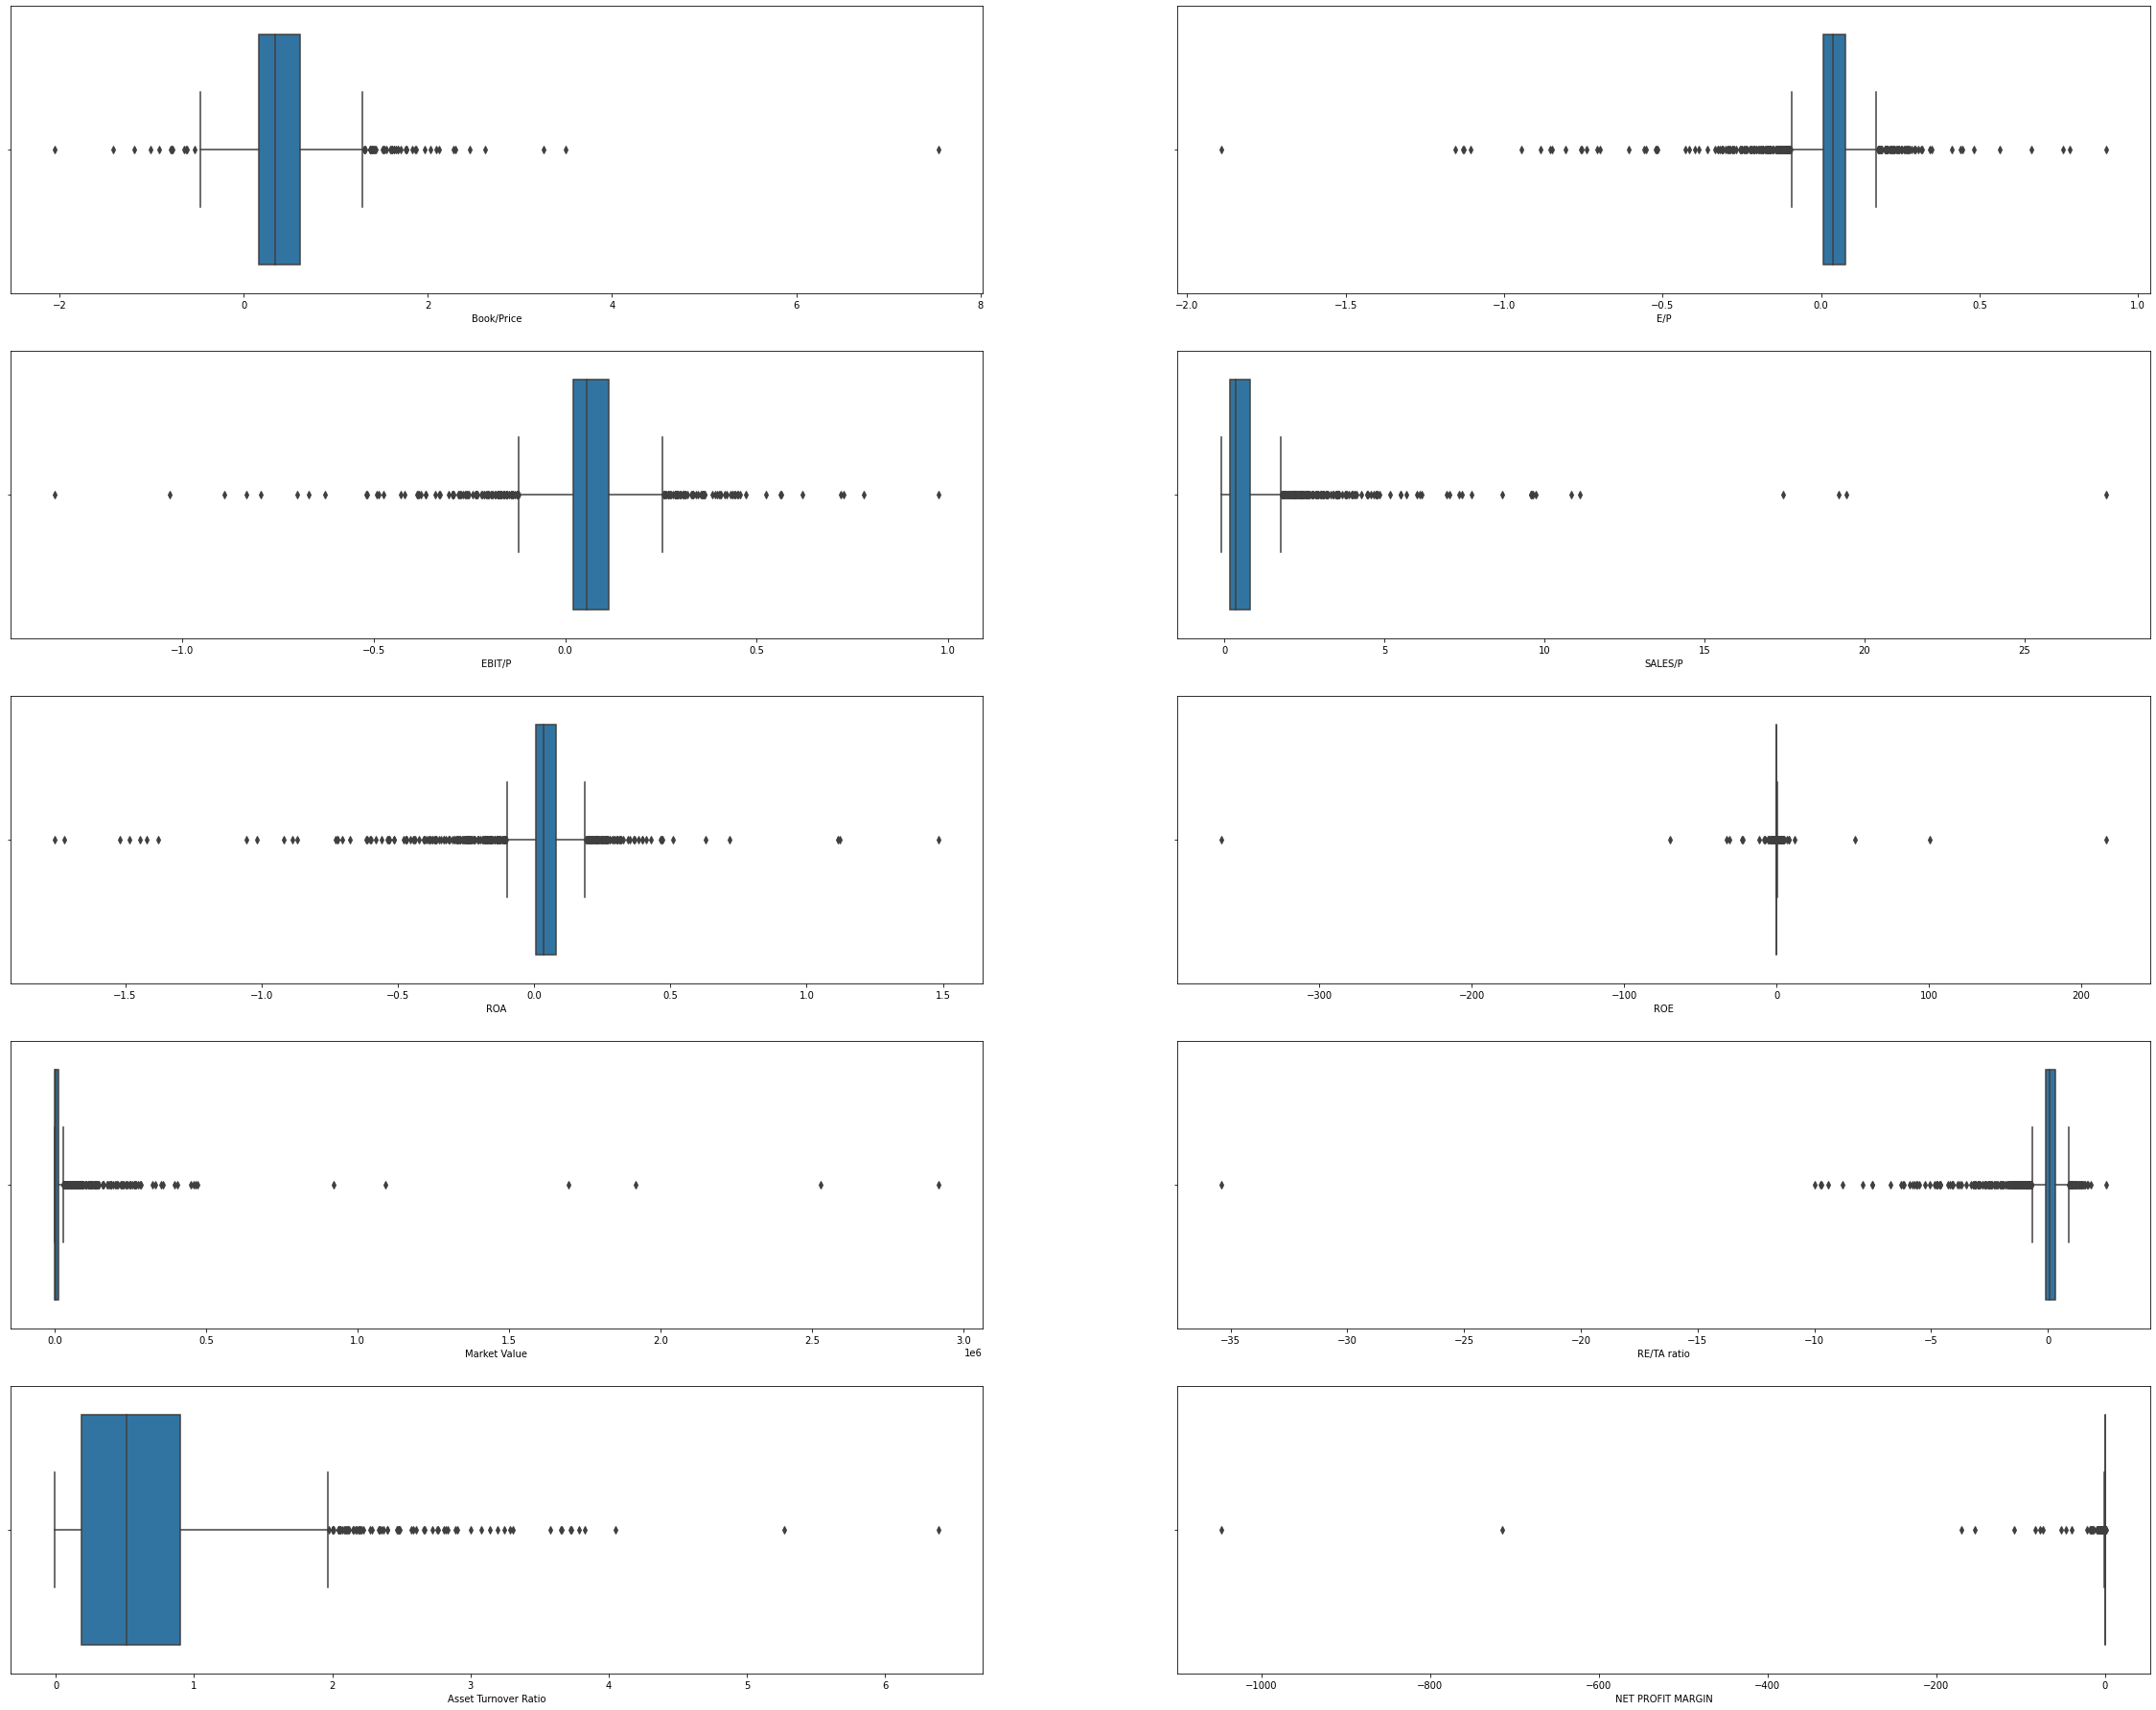

In [ ]:
columns = ['Book/Price','E/P', 'EBIT/P', 'SALES/P','ROA', 'ROE', 
           'Market Value', 'RE/TA ratio', 'Asset Turnover Ratio',
           'NET PROFIT MARGIN']


#Create boxplots for features to see outliers
fig, ax = plt.subplots(5, 2, figsize=(40, 32))
for col, subplot in zip(columns, ax.flatten()):
    sns.boxplot(x=data[col], ax=subplot)

Handle outliers via winsorization

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
data['ROA'] = winsorize(data['ROA'],(0.09,0.06))

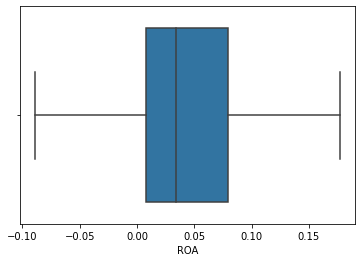

In [ ]:
sns.boxplot(x=data['ROA'])

In [ ]:
data['ROE'] = winsorize(data['ROE'],(0.09,0.075))

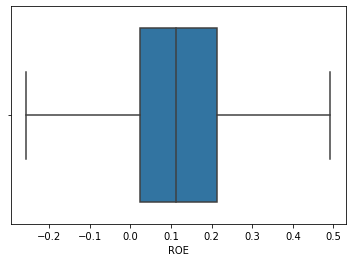

In [ ]:
sns.boxplot(x=data['ROE'])

In [ ]:
data['Book/Price'] = winsorize(data['Book/Price'],(0.02,0.025))

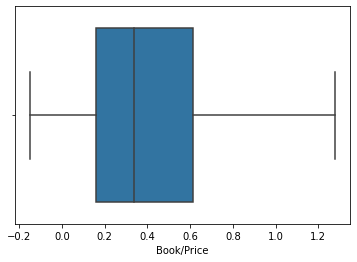

In [ ]:
sns.boxplot(x=data['Book/Price'])

In [ ]:
data['E/P'] = winsorize(data['E/P'],(0.08,0.04))

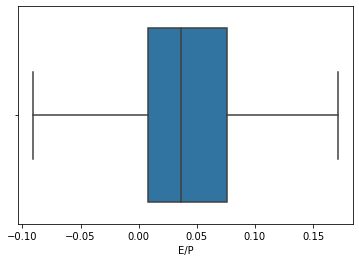

In [ ]:
sns.boxplot(x=data['E/P'])

In [ ]:
data['EBIT/P'] = winsorize(data['EBIT/P'],(0.05,0.045))

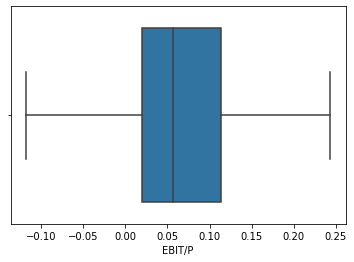

In [ ]:
sns.boxplot(x=data['EBIT/P'])

In [ ]:
data['SALES/P'] = winsorize(data['SALES/P'],(0,0.095))

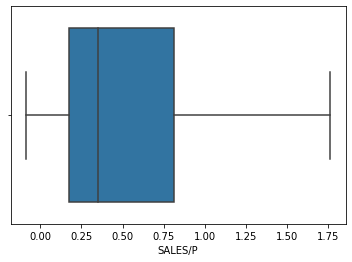

In [ ]:
sns.boxplot(x=data['SALES/P'])

In [ ]:
data['RE/TA ratio'] = winsorize(data['RE/TA ratio'],(0.105,0.03))

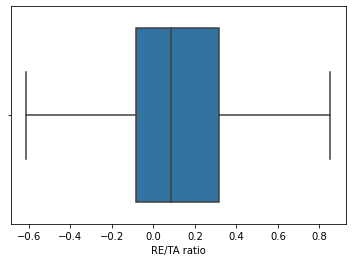

In [ ]:
sns.boxplot(x=data['RE/TA ratio'])

In [ ]:
data['Asset Turnover Ratio'] = winsorize(data['Asset Turnover Ratio'],(0,0.04))

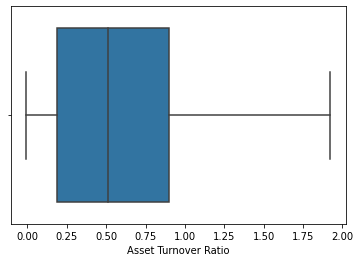

In [ ]:
sns.boxplot(x=data['Asset Turnover Ratio'])

In [ ]:
data['NET PROFIT MARGIN'] = winsorize(data['NET PROFIT MARGIN'],(0.075,0.045))

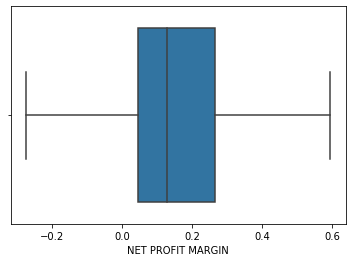

In [ ]:
sns.boxplot(x=data['NET PROFIT MARGIN'])

In [ ]:
data['Market Value'] = winsorize(data['Market Value'],(0,0.14))

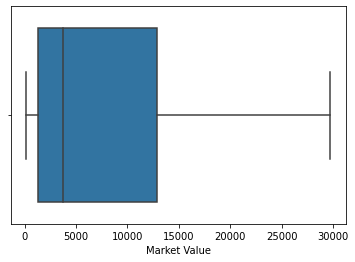

In [ ]:
sns.boxplot(x=data['Market Value'])

In [ ]:
#drop 3 null values for RE/TA ratio
data['RE/TA ratio'].dropna(inplace=True)

### e. Calculate Save the ticker symbol and the 10+ financial ratios for each stock in the list in a CSV file labelled “Fin-Ratios.csv”.

In [ ]:
columns_3 = ['Ticker','Book/Price','E/P', 'EBIT/P', 'SALES/P','ROA', 'ROE', 
           'Market Value', 'RE/TA ratio', 'Asset Turnover Ratio',
           'NET PROFIT MARGIN']

In [ ]:
data[columns_3].to_csv("Fin-Ratios.csv",index=False)

## Industry Indicators

### a. Using the methods outlined in Assignment #5, determine industry indicators for each stock in the list.

In [ ]:
# import data
pt = pd.read_csv('ProjectTickers.csv')
tg = pd.read_csv('Project-2021-Sector.csv')

In [ ]:
#merge the file based on ticker
pt = pt.merge(tg,left_on='Ticker',right_on='tic',how='left')

In [ ]:
pt.shape

(1886, 14)

In [ ]:
pt.head()

,Ticker,Name,RetYTD,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,ggroup
0,A,Agilent Technologies,-0.2080,126554.0,20211031.0,2021.0,INDL,C,D,STD,A,USD,A,3520.0
1,AA,Alcoa Corp,0.4731,27638.0,20211231.0,2021.0,INDL,C,D,STD,AA,USD,A,1510.0
2,AAL,American Airlines Gp,0.0579,1045.0,20211231.0,2021.0,INDL,C,D,STD,AAL,USD,A,2030.0
3,AAN,Aarons Holdings Company,-0.1327,37445.0,20211231.0,2021.0,INDL,C,D,STD,AAN,USD,A,2550.0
4,AAON,Aaon Inc,-0.3456,21542.0,20211231.0,2021.0,INDL,C,D,STD,AAON,USD,A,2010.0


### b. Save the ticker symbol and the industry indicators for each stock in the list in a CSV file labelled “Industry.csv”.

In [ ]:
pt[['Ticker','ggroup']].to_csv("Industry.csv",index=False)

## Run OLS explanatory for 4 categories:

### a. Risk Regressions:

i. $Ret(i) = a + b1*MktExposure(i) + b2*SizeExposure(i) +
b3*ValueExposure(i) + e$

In [ ]:
# regression
y = data_ff["RET"]
X = data_ff[['mktrf' , 'smb' , 'hml']]
#Use statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6777.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:23:26   Log-Likelihood:                 59900.
No. Observations:              114715   AIC:                        -1.198e+05
Df Residuals:                  114711   BIC:                        -1.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.000     10.929      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ii. Interpret and explain your findings (focus on R2, Adj R2 and
coefficients)

* The "R2" and "Adjusted R2" of 0.151, indicate that 15.1% of the variance for company's Year-To-Date Return can be explained by these risk exposure variables in a linear regression model. 
* P-values for the coefficients for all variables are 0.000, indicating within 95% confidence interval, all coefficients are statistically different from 0.
* All variables are positively related to the Year-To-Date Return. According to the coefficient, e.g., With one unit increase of mktrf, the Year-To-Date will increase by an average of 1.0643.



### b. Financial Characteristics:
i. $Ret(i) = a + c1*Ratio1(i) + c2*Ratio2(i) + … + c10*Ratio10 (i) + e$

In [ ]:
data.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,at,...,Book/Price,E/P,EBIT/P,SALES/P,ROA,ROE,Market Value,RE/TA ratio,Asset Turnover Ratio,NET PROFIT MARGIN
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,1539.700,...,0.760488,0.027941,0.051121,1.288865,0.023251,0.036741,1281.28250,0.469832,1.072547,0.039663
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,66467.000,...,-0.148290,-0.090778,-0.117984,1.761143,-0.029985,0.271526,11633.19488,-0.219357,0.449576,-0.184526
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,22003.222,...,0.740913,0.077616,0.101023,0.477178,0.028120,0.104758,7971.51693,0.145881,0.172876,0.211710
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,75196.000,...,0.144202,0.028480,0.036113,0.173496,0.094034,0.197503,29734.98190,0.307915,0.572836,0.208149
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,12419.000,...,0.043164,0.018205,0.021176,0.094618,0.176781,0.421769,29734.98190,-0.117079,1.323295,0.223804


In [ ]:
# define x as a subset of original dataframe
X = data[columns]
X = sm.add_constant(X)
# define y as a series
y = data['RetYTD']

# pass x as a dataframe, while pass y as a series
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     19.59
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           9.49e-35
Time:                        20:23:26   Log-Likelihood:                 79.986
No. Observations:                1886   AIC:                            -138.0
Df Residuals:                    1875   BIC:                            -77.01
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1817 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ii. Interpret and explain your findings (focus on R2, Adj R2 and
coefficients)

* The "R2" 0.095 and "Adjusted R2" of 0.090, indicate that 9% of the variance for company's Year-To-Date Return can be explained by these financial or financial ratio variables in a linear regression model. 
* P-values for the coefficients for all Book/Price, E/P, SALES/P, ROA, Market Value, Asset Turnover Ratio are less than 0.05, indicating within 95% confidence interval, all coefficient are statistically different from 0. But we cannot reject the null that the coefficients for EBIT/P, ROE, RE/TA ratio, and NET PROFIT MARGIN are 0.
* Book/Price, EBIT/P, SALES/P, ROA, ROE, Market Value are positively related to the Year-To-Date Return; while E/P, RE/TA ratio, Asset Turnover Ratio and NET PROFIT MARGIN are negatively related to the Year-To-Date Return. According to the coefficient, e.g., With one unit increase of Book/Price, the Year-To-Date will increase by an average of 0.1593.


### c. Industry Dummies:


i. $Ret(i) = a + coefficients*IndustryDummies + e$

In [ ]:
pt.head()

,Ticker,Name,RetYTD,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,ggroup
0,A,Agilent Technologies,-0.2080,126554.0,20211031.0,2021.0,INDL,C,D,STD,A,USD,A,3520.0
1,AA,Alcoa Corp,0.4731,27638.0,20211231.0,2021.0,INDL,C,D,STD,AA,USD,A,1510.0
2,AAL,American Airlines Gp,0.0579,1045.0,20211231.0,2021.0,INDL,C,D,STD,AAL,USD,A,2030.0
3,AAN,Aarons Holdings Company,-0.1327,37445.0,20211231.0,2021.0,INDL,C,D,STD,AAN,USD,A,2550.0
4,AAON,Aaon Inc,-0.3456,21542.0,20211231.0,2021.0,INDL,C,D,STD,AAON,USD,A,2010.0


In [ ]:
pt_dum = pd.get_dummies(pt, columns=['ggroup'],drop_first=True)

In [ ]:
pt_dum.columns

Index(['Ticker', 'Name ', 'RetYTD', 'gvkey', 'datadate', 'fyear', 'indfmt',
       'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'costat',
       'ggroup_1510.0', 'ggroup_2010.0', 'ggroup_2020.0', 'ggroup_2030.0',
       'ggroup_2510.0', 'ggroup_2520.0', 'ggroup_2530.0', 'ggroup_2550.0',
       'ggroup_3010.0', 'ggroup_3020.0', 'ggroup_3030.0', 'ggroup_3510.0',
       'ggroup_3520.0', 'ggroup_4010.0', 'ggroup_4020.0', 'ggroup_4030.0',
       'ggroup_4510.0', 'ggroup_4520.0', 'ggroup_4530.0', 'ggroup_5010.0',
       'ggroup_5020.0', 'ggroup_5510.0', 'ggroup_6010.0'],
      dtype='object')

In [ ]:
# define X as a subset of original dataframe
pt_dum['constant'] = 1

X = pt_dum[['ggroup_1510.0', 'ggroup_2010.0', 'ggroup_2020.0', 'ggroup_2030.0',
       'ggroup_2510.0', 'ggroup_2520.0', 'ggroup_2530.0', 'ggroup_2550.0',
       'ggroup_3010.0', 'ggroup_3020.0', 'ggroup_3030.0', 'ggroup_3510.0',
       'ggroup_3520.0', 'ggroup_4010.0', 'ggroup_4020.0', 'ggroup_4030.0',
       'ggroup_4510.0', 'ggroup_4520.0', 'ggroup_4530.0', 'ggroup_5010.0',
       'ggroup_5020.0', 'ggroup_5510.0', 'ggroup_6010.0','constant']]
# define y as a series
y = pt_dum['RetYTD']

# pass x as a dataframe, while pass y as a series
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     18.56
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.10e-67
Time:                        20:23:27   Log-Likelihood:                 180.91
No. Observations:                1886   AIC:                            -313.8
Df Residuals:                    1862   BIC:                            -180.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ggroup_1510.0    -0.1206      0.029     -4.166

ii. Interpret and explain your findings (focus on R2, Adj R2 and
coefficients)

* The "R2" of 0.186 and "Adjusted R2" of 0.176, indicate that 17.6% of the variance for company's Year-To-Date Return can be explained by these industry group variables in a linear regression model. 
* P-values for the coefficients for almost all variables are less than 0.05, indicating within 95% confidence interval, all coefficients are statistically different from 0. But we can not reject the null that the coefficient for ggroup_3010 is 0.
* All variables are negatively related to the Year-To-Date Return. According to the coefficient, e.g., when a company is in ggroup_1510, the Year-To-Date will decrease by an average of 0.1206.

### d. Combined Regressions:


In [ ]:
data_ff.shape

(114715, 9)

In [ ]:
#combine datasets
data_all = data_ff.merge(data[columns_3],how='inner',left_on='TICKER',right_on='Ticker')
data_all = data_all.merge(pt_dum,how='inner',on='Ticker')

In [ ]:
data_all.shape

(113160, 56)

In [ ]:
data_all.columns

Index(['PERMNO', 'date', 'TICKER', 'RET', 'dateff', 'mktrf', 'smb', 'hml',
       'rf', 'Ticker', 'Book/Price', 'E/P', 'EBIT/P', 'SALES/P', 'ROA', 'ROE',
       'Market Value', 'RE/TA ratio', 'Asset Turnover Ratio',
       'NET PROFIT MARGIN', 'Name ', 'RetYTD', 'gvkey', 'datadate', 'fyear',
       'indfmt', 'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'costat',
       'ggroup_1510.0', 'ggroup_2010.0', 'ggroup_2020.0', 'ggroup_2030.0',
       'ggroup_2510.0', 'ggroup_2520.0', 'ggroup_2530.0', 'ggroup_2550.0',
       'ggroup_3010.0', 'ggroup_3020.0', 'ggroup_3030.0', 'ggroup_3510.0',
       'ggroup_3520.0', 'ggroup_4010.0', 'ggroup_4020.0', 'ggroup_4030.0',
       'ggroup_4510.0', 'ggroup_4520.0', 'ggroup_4530.0', 'ggroup_5010.0',
       'ggroup_5020.0', 'ggroup_5510.0', 'ggroup_6010.0', 'constant'],
      dtype='object')

In [ ]:
X = data_all[['mktrf','smb' ,'hml','Book/Price','E/P', 'EBIT/P', 'SALES/P','ROA', 'ROE', 
           'Market Value', 'RE/TA ratio', 'Asset Turnover Ratio',
           'NET PROFIT MARGIN','ggroup_1510.0', 'ggroup_2010.0', 'ggroup_2020.0', 'ggroup_2030.0',
       'ggroup_2510.0', 'ggroup_2520.0', 'ggroup_2530.0', 'ggroup_2550.0',
       'ggroup_3010.0', 'ggroup_3020.0', 'ggroup_3030.0', 'ggroup_3510.0',
       'ggroup_3520.0', 'ggroup_4010.0', 'ggroup_4020.0', 'ggroup_4030.0',
       'ggroup_4510.0', 'ggroup_4520.0', 'ggroup_4530.0', 'ggroup_5010.0',
       'ggroup_5020.0', 'ggroup_5510.0', 'ggroup_6010.0','constant',]]
X = sm.add_constant(X)

# define y as a series
y = data_all['RetYTD']
# pass x as a dataframe, while pass y as a series
print(sm.OLS(y, X).fit().summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                 RetYTD   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     1073.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:23:27   Log-Likelihood:                 15797.
No. Observations:              113160   AIC:                        -3.152e+04
Df Residuals:                  113123   BIC:                        -3.116e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
mktrf                 1.305e-13 

ii. Interpret and explain your findings (focus on R2, Adj R2 and
coefficients)


* The "R2" of 0.255 and "Adjusted R2" of 0.254, indicate that 25.4% of the variance for company's Year-To-Date Return can be explained by all these variables in a linear regression model. 
* P-values for the coefficients for almost all variables are less than 0.05, indicating within 95% confidence interval, all coefficients are statistically different from 0. But we can not reject the null that the coefficient for three risk exposure variables is 0.
* Most variables are negatively related to the Year-To-Date Return, while Book/Price, SALES/P, SALES/P, Market Value are positively related to the company's Year-To-Date Return. According to the coefficient, e.g., With one unit increase of Book/Price ratio, the Year-To-Date will increase by an average of 0.1482.

## Appendix:

### 1. Heatmap to check variable correlation

In [ ]:
corr = data_all[['mktrf','smb' ,'hml','Book/Price','E/P', 'EBIT/P', 'SALES/P','ROA', 'ROE', 
           'Market Value', 'RE/TA ratio', 'Asset Turnover Ratio',
           'NET PROFIT MARGIN','ggroup_1510.0', 'ggroup_2010.0', 'ggroup_2020.0', 'ggroup_2030.0',
       'ggroup_2510.0', 'ggroup_2520.0', 'ggroup_2530.0', 'ggroup_2550.0',
       'ggroup_3010.0', 'ggroup_3020.0', 'ggroup_3030.0', 'ggroup_3510.0',
       'ggroup_3520.0', 'ggroup_4010.0', 'ggroup_4020.0', 'ggroup_4030.0',
       'ggroup_4510.0', 'ggroup_4520.0', 'ggroup_4530.0', 'ggroup_5010.0',
       'ggroup_5020.0', 'ggroup_5510.0', 'ggroup_6010.0','RetYTD']].corr()

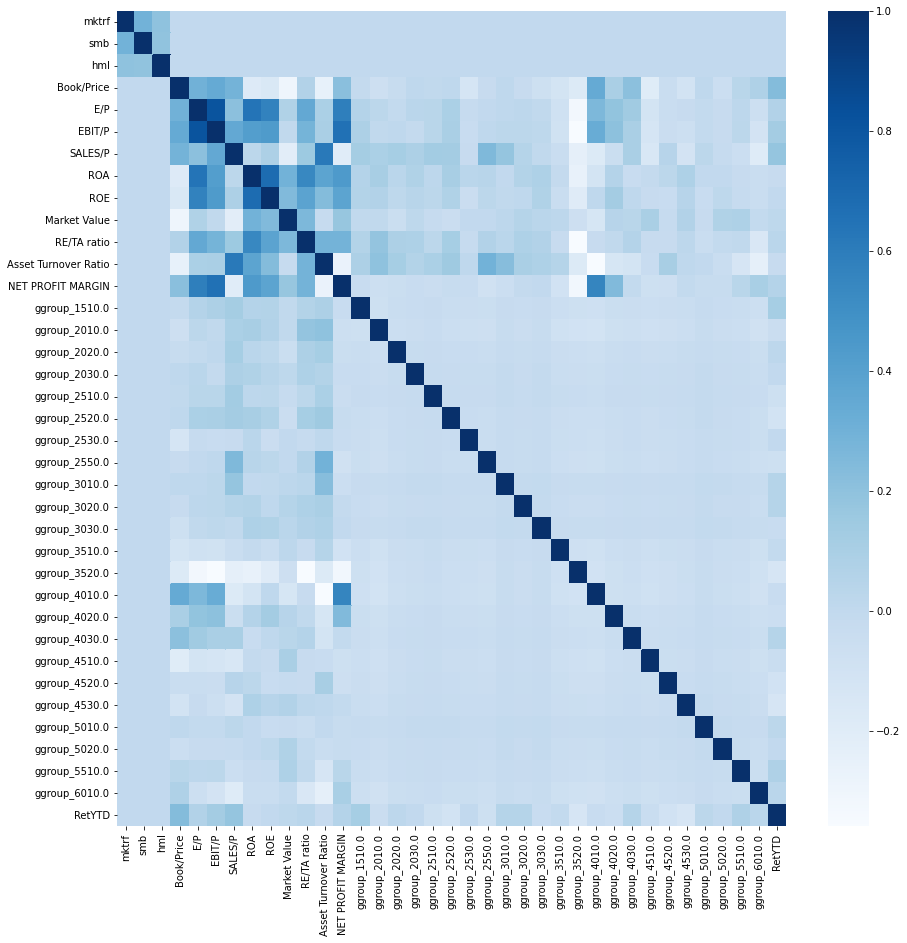

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='Blues')

### 2. Companies number distribution in each Sector

In [ ]:
pt.head()

,Ticker,Name,RetYTD,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,ggroup
0,A,Agilent Technologies,-0.2080,126554.0,20211031.0,2021.0,INDL,C,D,STD,A,USD,A,3520.0
1,AA,Alcoa Corp,0.4731,27638.0,20211231.0,2021.0,INDL,C,D,STD,AA,USD,A,1510.0
2,AAL,American Airlines Gp,0.0579,1045.0,20211231.0,2021.0,INDL,C,D,STD,AAL,USD,A,2030.0
3,AAN,Aarons Holdings Company,-0.1327,37445.0,20211231.0,2021.0,INDL,C,D,STD,AAN,USD,A,2550.0
4,AAON,Aaon Inc,-0.3456,21542.0,20211231.0,2021.0,INDL,C,D,STD,AAON,USD,A,2010.0


In [ ]:
pt.ggroup.value_counts()

4010.0    179
2010.0    169
3520.0    160
6010.0    131
3510.0    111
4510.0    109
1510.0     91
4020.0     90
2550.0     80
4520.0     76
1010.0     74
2530.0     63
4030.0     61
2020.0     59
5510.0     58
2520.0     54
4530.0     51
5020.0     39
2030.0     38
3020.0     36
2510.0     23
3010.0     16
3030.0     16
5010.0     13
Name: ggroup, dtype: int64

Text(0.5, 0, 'Sector')

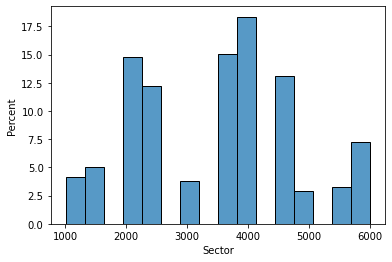

In [ ]:
sns.histplot(x=pt.ggroup,stat="percent")
plt.xlabel("Sector")

Text(0.5, 0, 'Sector')

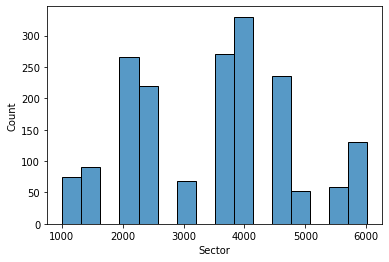

In [ ]:
sns.histplot(x=pt.ggroup)
plt.xlabel("Sector")

### 3. Average Return YTD in each Industry

In [ ]:
avg_ret = pt.groupby(['ggroup']).mean().reset_index()[['ggroup','RetYTD']]
avg_ret

,ggroup,RetYTD
0,1010.0,0.518715
1,1510.0,0.064418
2,2010.0,-0.096122
3,2020.0,-0.033625
4,2030.0,-0.063847
5,2510.0,-0.213870
6,2520.0,-0.206102
7,2530.0,-0.061554
8,2550.0,-0.146284
9,3010.0,0.079444


Find the highest and lowest return industries make economic sense for early 2022 (RetYTD) Explain in detail.

In [ ]:
avg_ret.sort_values(by='RetYTD').head(1)

,ggroup,RetYTD
19,4530.0,-0.253339


In [ ]:
avg_ret.sort_values(by='RetYTD',ascending=False).head(1)

,ggroup,RetYTD
0,1010.0,0.518715


The highest and lowest return industries do make economic sense for early 2022.The energy sector has the highest stock return from the rising energy prices due to inflation, and as the U.S. imposed sanctions on Russian energy imports in early 2022. While the semiconductors industry has the lowest return due to the increased risk of consumer spending slowing down.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

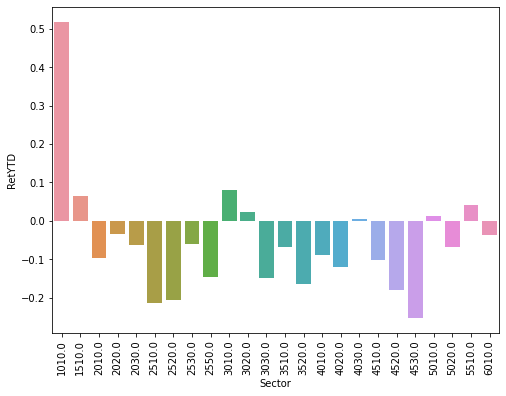

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=avg_ret,x='ggroup',y='RetYTD')
plt.xlabel("Sector")
plt.xticks(rotation = 90)

## Summary:

* The highest and lowest return industries are energy and semiconductors, respectively.The energy sector has the highest stock return from the rising energy prices due to inflation, and also during the time when the U.S. imposed sanctions on Russian energy imports in early 2022. While the semiconductors industry has the lowest return due to the increased risk of consumer spending slowing down.

* To generate strong YTD return, companies should focus on the increase of Book/Price ratio, SALES/Price ratio and ROE. Investors should also refer to these financial indicators to make investment decisions.

* Investors might want to consider stocks in energy, material, food and Staples retailing, and utilities industries that would get higher YTD return.